In [11]:
import pandas as pd

df = pd.read_csv('Google-Playstore.csv');

In [12]:
df.info

<bound method DataFrame.info of                                                   App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2      

In [13]:
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

In [14]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2312939    False
2312940    False
2312941    False
2312942    False
2312943    False
Length: 2312944, dtype: bool

In [15]:
df.isnull().any()

App Name              True
App Id               False
Category             False
Rating                True
Rating Count          True
Installs              True
Minimum Installs      True
Maximum Installs     False
Free                 False
Price                False
Currency              True
Size                  True
Minimum Android       True
Developer Id          True
Developer Website     True
Developer Email       True
Released              True
Last Updated         False
Content Rating       False
Privacy Policy        True
Ad Supported         False
In App Purchases     False
Editors Choice       False
Scraped Time         False
dtype: bool

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64

In [18]:
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 8.2000e+02, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [19]:
df['Minimum Installs'].unique()

array([1.e+01, 5.e+03, 1.e+02, 5.e+01, 5.e+04, 1.e+04, 1.e+03, 5.e+02,
       5.e+05, 1.e+05, 1.e+07, 1.e+00, 1.e+06, 5.e+00, 5.e+06, 1.e+08,
       0.e+00, 5.e+07, 1.e+09, 5.e+08, 5.e+09, 1.e+10])

In [20]:
df = df.astype({
    'App Name': 'string',
    'App Id': 'string',
    'Category': 'category',
    'Rating': 'float64',
    'Rating Count': 'float64',
    'Minimum Installs': 'float64',
    'Maximum Installs': 'float64',
    'Free': 'bool',
    'Price': 'float64',
    'Currency': 'category',
    'Size': 'string',
    'Minimum Android': 'category',
    'Developer Id': 'string',
    'Developer Website': 'string',
    'Developer Email': 'string',
    'Released': 'datetime64[ns]',
    'Last Updated': 'datetime64[ns]',
    'Content Rating': 'string',
    'Privacy Policy': 'string',
    'Ad Supported': 'bool',
    'In App Purchases': 'bool',
    'Editors Choice': 'bool',
    'Scraped Time': 'datetime64[ns]'
})
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype('float64')

In [21]:
df.to_pickle("googleDb.pkl")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle("googleDb.pkl")

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Rating Count'}>,
        <Axes: title={'center': 'Installs'}>],
       [<Axes: title={'center': 'Minimum Installs'}>,
        <Axes: title={'center': 'Maximum Installs'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Released'}>,
        <Axes: title={'center': 'Last Updated'}>,
        <Axes: title={'center': 'Scraped Time'}>]], dtype=object)

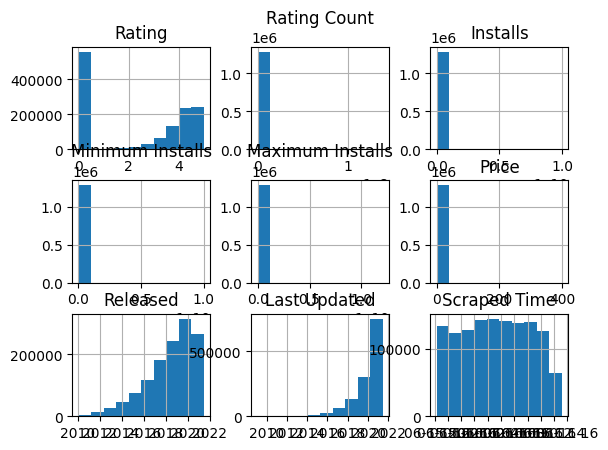

In [23]:
df.hist()

C:\Users\banco\AppData\Local\Temp\ipykernel_6988\3432813846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings = df.groupby('Category')['Rating'].mean()


<Axes: xlabel='Category'>

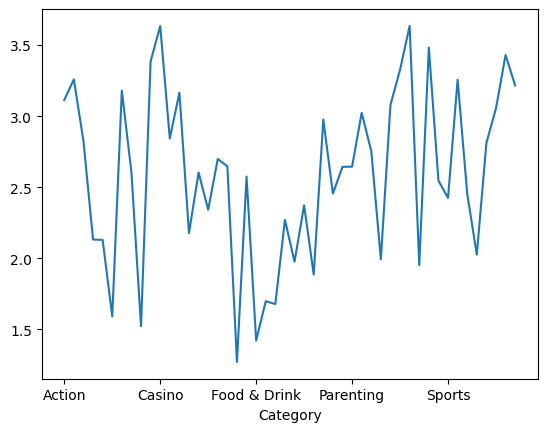

In [24]:
mean_ratings = df.groupby('Category')['Rating'].mean()
mean_ratings.plot()

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price
Rating,1.000000,0.016184,0.013084,0.013084,0.015020,-0.003883
Rating Count,0.016184,1.000000,0.536045,0.536045,0.560042,-0.000605
Installs,0.013084,0.536045,1.000000,1.000000,0.956965,-0.000641
Minimum Installs,0.013084,0.536045,1.000000,1.000000,0.956965,-0.000641
Maximum Installs,0.015020,0.560042,0.956965,0.956965,1.000000,-0.000732
Price,-0.003883,-0.000605,-0.000641,-0.000641,-0.000732,1.000000


Gini Index - Category: 0.9558112602251916
Gini Index - Content Rating: 0.23141570503492548
Gini Index - Ad Supported: 0.4943396954375304
Gini Index - In App Purchases: 0.1897296873398171
Gini Index - Editors Choice: 0.0012018955796819775


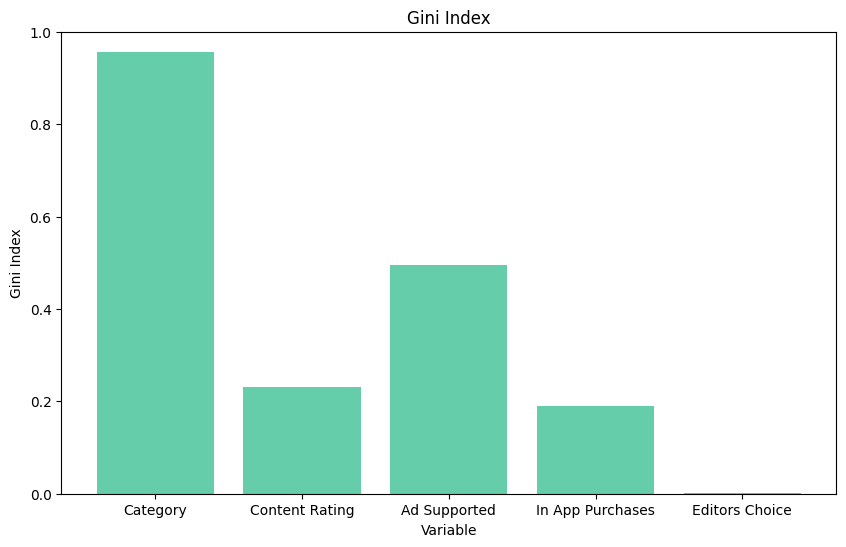

In [36]:
category_counts = df['Category'].value_counts()

total_apps = len(df)

gini_index = 1

for count in category_counts:
    probability = count / total_apps
    gini_index -= probability ** 2
print("Gini Index - Category:", gini_index)

# Gini Index - Content Rating
content_rating_counts = df['Content Rating'].value_counts()
gini_index_content_rating = 1 - sum((count / total_apps) ** 2 for count in content_rating_counts)
print("Gini Index - Content Rating:", gini_index_content_rating)

# Gini Index - Ad Supported
ad_supported_counts = df['Ad Supported'].value_counts()
gini_index_ad_supported = 1 - sum((count / total_apps) ** 2 for count in ad_supported_counts)
print("Gini Index - Ad Supported:", gini_index_ad_supported)

# Gini Index - In App Purchases
in_app_purchases_counts = df['In App Purchases'].value_counts()
gini_index_in_app_purchases = 1 - sum((count / total_apps) ** 2 for count in in_app_purchases_counts)
print("Gini Index - In App Purchases:", gini_index_in_app_purchases)

# Gini Index - Editors Choice
editors_choice_counts = df['Editors Choice'].value_counts()
gini_index_editors_choice = 1 - sum((count / total_apps) ** 2 for count in editors_choice_counts)
print("Gini Index - Editors Choice:", gini_index_editors_choice)

import matplotlib.pyplot as plt

variables = ['Category', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']
gini_indices = [gini_index, gini_index_content_rating, gini_index_ad_supported, gini_index_in_app_purchases, gini_index_editors_choice]

plt.figure(figsize=(10, 6))
plt.bar(variables, gini_indices, color='mediumaquamarine')
plt.title('Gini Index')
plt.xlabel('Variable')
plt.ylabel('Gini Index')
plt.ylim(0, 1)
plt.show()

Entropy 'Category': 4.887536348176394
Entropy 'Content Rating': 0.7108786966395728
Entropy 'Ad Supported': 0.9918184289575542
Entropy 'In App Purchases': 0.48812519842147617
Entropy 'Editors Choice': 0.007301017802566471


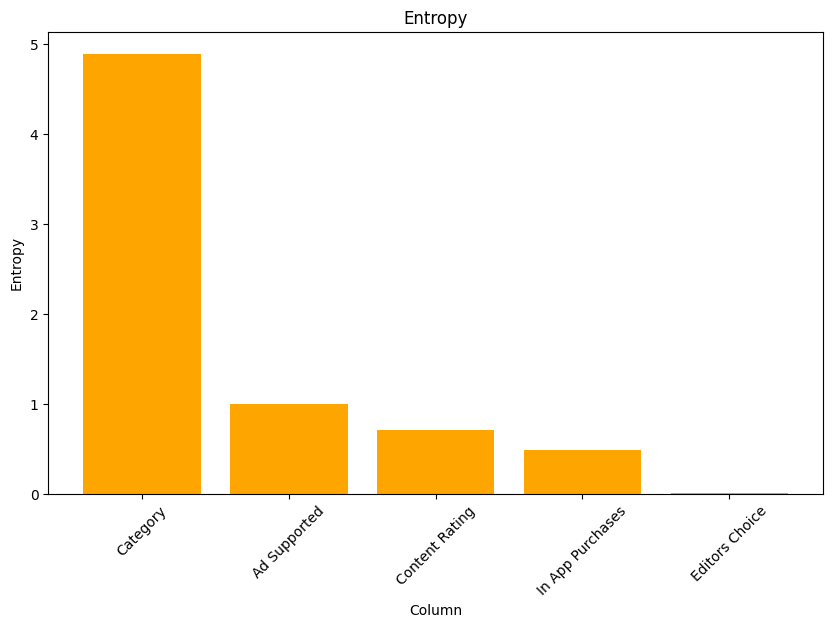

In [27]:
# Category
category_entropy = -sum(df['Category'].value_counts(normalize=True) * np.log2(df['Category'].value_counts(normalize=True)))
print("Entropy 'Category':", category_entropy)

# Content Rating
content_rating_entropy = -sum(df['Content Rating'].value_counts(normalize=True) * np.log2(df['Content Rating'].value_counts(normalize=True)))
print("Entropy 'Content Rating':", content_rating_entropy)

# Ad Supported
ad_supported_entropy = -sum(df['Ad Supported'].value_counts(normalize=True) * np.log2(df['Ad Supported'].value_counts(normalize=True)))
print("Entropy 'Ad Supported':", ad_supported_entropy)

# In App Purchases
in_app_purchases_entropy = -sum(df['In App Purchases'].value_counts(normalize=True) * np.log2(df['In App Purchases'].value_counts(normalize=True)))
print("Entropy 'In App Purchases':", in_app_purchases_entropy)

# Editors Choice
editors_choice_entropy = -sum(df['Editors Choice'].value_counts(normalize=True) * np.log2(df['Editors Choice'].value_counts(normalize=True)))
print("Entropy 'Editors Choice':", editors_choice_entropy)

entropies = {
    'Category': category_entropy,
    'Content Rating': content_rating_entropy,
    'Ad Supported': ad_supported_entropy,
    'In App Purchases': in_app_purchases_entropy,
    'Editors Choice': editors_choice_entropy
}

entropies_df = pd.DataFrame.from_dict(entropies, orient='index', columns=['Entropy'])

entropies_df = entropies_df.sort_values(by='Entropy', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(entropies_df.index, entropies_df['Entropy'], color='orange')
plt.title('Entropy')
plt.xlabel('Column')
plt.ylabel('Entropy')
plt.xticks(rotation=45)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definim caracteristicile și var targetata
X = df[['Rating Count', 'Minimum Installs', 'Maximum Installs', 'Price', 'Ad Supported']]
#X = df[['Rating Count', 'Minimum Installs', 'Maximum Installs', 'Price', 'Ad Supported', 'Category']]
y = df['Rating']

X = pd.get_dummies(X, columns=['Ad Supported'], drop_first=True)
#X = pd.get_dummies(X, columns=['Ad Supported', 'Category'], drop_first=True)

# Impartim setul de date în set de antrenare si set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inițializam si antrenam modelul
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Facem predicții pe setul de testare
y_pred_lr = model_lr.predict(X_test)

# Evaluam performanța modelului
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Regresia liniara):", mse_lr)

Mean Squared Error (Regresia liniara): 4.177125186000566


In [29]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardizam caracteristicile
scaler = StandardScaler()

# Inițializam modelul și pipeline-ul
model_ridge = make_pipeline(scaler, Ridge(alpha=0.1))

# Antrenam modelul
model_ridge.fit(X_train, y_train)

# Facem predictii pe setul de testare
y_pred_ridge = model_ridge.predict(X_test)

# Evaluam performanța modelului
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 4.177125186362969


In [30]:
from sklearn.ensemble import RandomForestRegressor
import pickle

# Inițializam si antrenam modelul
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Facem predicții pe setul de testare
y_pred_rf = model_rf.predict(X_test)

# Evaluam performanța modelului
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regressor):", mse_rf)

pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

Mean Squared Error (Random Forest Regressor): 0.27221713602543535


In [31]:
import pickle
loaded_model_rf = pickle.load(open('model_rf.pkl', 'rb'))

[0]	train-rmse:0.77473	test-rmse:0.77559
[1]	train-rmse:0.50189	test-rmse:0.50347
[2]	train-rmse:0.46898	test-rmse:0.47114
[3]	train-rmse:0.46712	test-rmse:0.46954
[4]	train-rmse:0.46522	test-rmse:0.46815
[5]	train-rmse:0.46474	test-rmse:0.46810
[6]	train-rmse:0.46449	test-rmse:0.46826
[7]	train-rmse:0.46425	test-rmse:0.46844
[8]	train-rmse:0.46405	test-rmse:0.46862
[9]	train-rmse:0.46376	test-rmse:0.46883
[10]	train-rmse:0.46363	test-rmse:0.46890
[11]	train-rmse:0.46341	test-rmse:0.46905
[12]	train-rmse:0.46330	test-rmse:0.46911
[13]	train-rmse:0.46318	test-rmse:0.46913
[14]	train-rmse:0.46313	test-rmse:0.46917
Mean Squared Error (XGBoost): 0.22017529734743876
Coeficientul de determinare R^2 (XGBoost): 0.9496127997349212


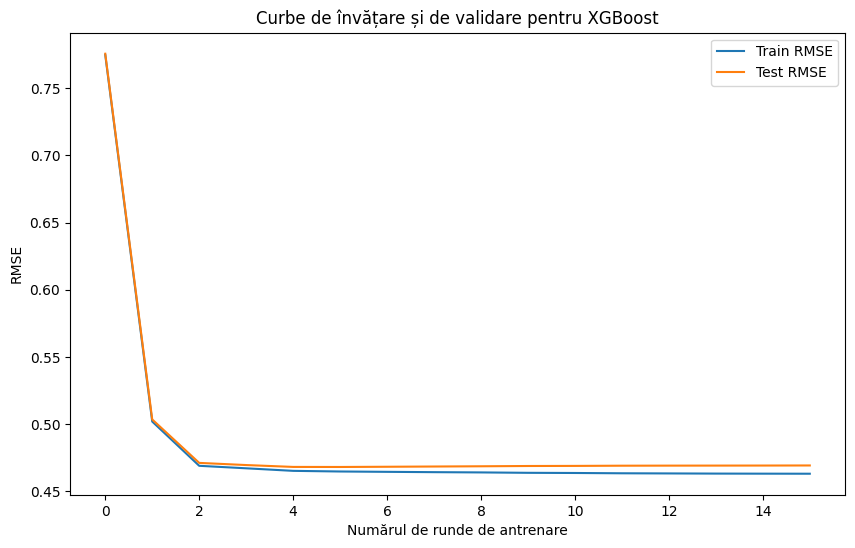

In [39]:
from sklearn.metrics import r2_score
from matplotlib import pyplot
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 10,
    'eta': 0.7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

# Antrenarea modelului XGBoost
evals_result = {}
model_xgboost = xgb.train(params, dtrain, num_round, evals=[(dtrain, 'train'), (dtest, 'test')], evals_result=evals_result, early_stopping_rounds=10)

# Extrage erorile RMSE pentru setul de antrenare și test din dicționarul evals_result
train_rmse = evals_result['train']['rmse']
test_rmse = evals_result['test']['rmse']

y_pred = model_xgboost.predict(dtest)

mse_xgboost = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (XGBoost):", mse_xgboost)

r2_xgboost = r2_score(y_test, y_pred)
print("Coeficientul de determinare R^2 (XGBoost):", r2_xgboost)

model_xgboost.save_model("xgboost.ubj")

# Trasează curbele de învățare și de validare
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(test_rmse, label='Test RMSE')
plt.xlabel('Numărul de runde de antrenare')
plt.ylabel('RMSE')
plt.title('Curbe de învățare și de validare pentru XGBoost')
plt.legend()
plt.show()

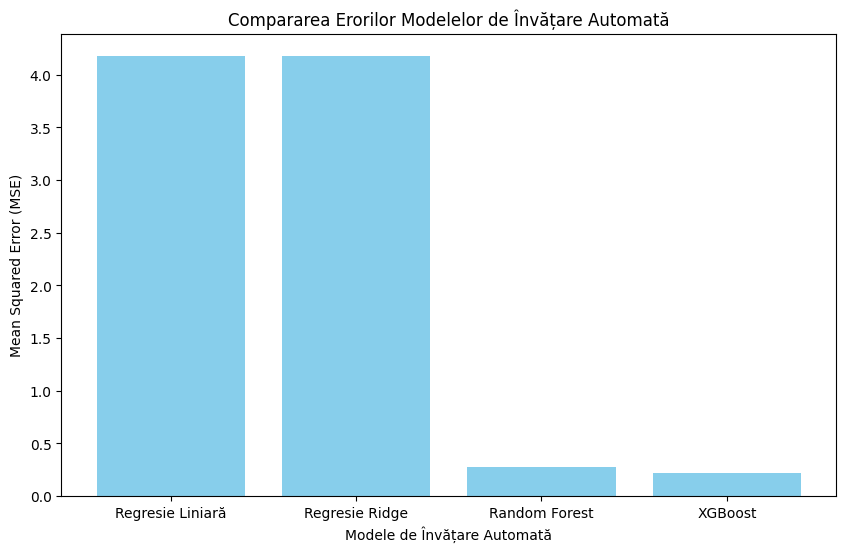

In [33]:
import matplotlib.pyplot as plt

# Lista cu numele modelelor și erorile corespunzătoare
modele = ['Regresie Liniară', 'Regresie Ridge', 'Random Forest', 'XGBoost']
erori = [mse_lr, mse_ridge, mse_rf, mse_xgboost]  # Trebuie să definești aceste variabile cu erorile corespunzătoare din codul tău

# Crearea graficului bară
plt.figure(figsize=(10, 6))
plt.bar(modele, erori, color='skyblue')

# Adăugarea etichetelor și titlului
plt.xlabel('Modele de Învățare Automată')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Compararea Erorilor Modelelor de Învățare Automată')

# Afișarea graficului
plt.show()

In [40]:
# Predictie de rating pentru o aplicatie noua
new_app = {
    'Rating Count': 1600,
    'Minimum Installs': 10000,
    'Maximum Installs': 50000,
    'Price': 0,
    'Ad Supported_True': 1,
}

new_app_df = pd.DataFrame([new_app])

predicted_rating_lr = model_lr.predict(new_app_df)
predicted_rating_rf = loaded_model_rf.predict(new_app_df)
predicted_rating_ridge = model_ridge.predict(new_app_df)

new_app_df = pd.DataFrame(new_app, index=[0])

new_app_dmatrix = xgb.DMatrix(new_app_df)
predicted_rating_xgboost = model_xgboost.predict(new_app_dmatrix)

print("Linear Regression - rating ", predicted_rating_lr)
print("Ridge Regression - rating ", predicted_rating_ridge)
print("Random Forest Regressor - rating ", predicted_rating_rf)
print("XGBoost - rating ", predicted_rating_xgboost)

Linear Regression - rating  [2.8005784]
Ridge Regression - rating  [2.80057834]
Random Forest Regressor - rating  [4.432]
XGBoost - rating  [4.315855]
